<class 'pandas.core.frame.DataFrame'>
Accuracy: 0.7786885245901639


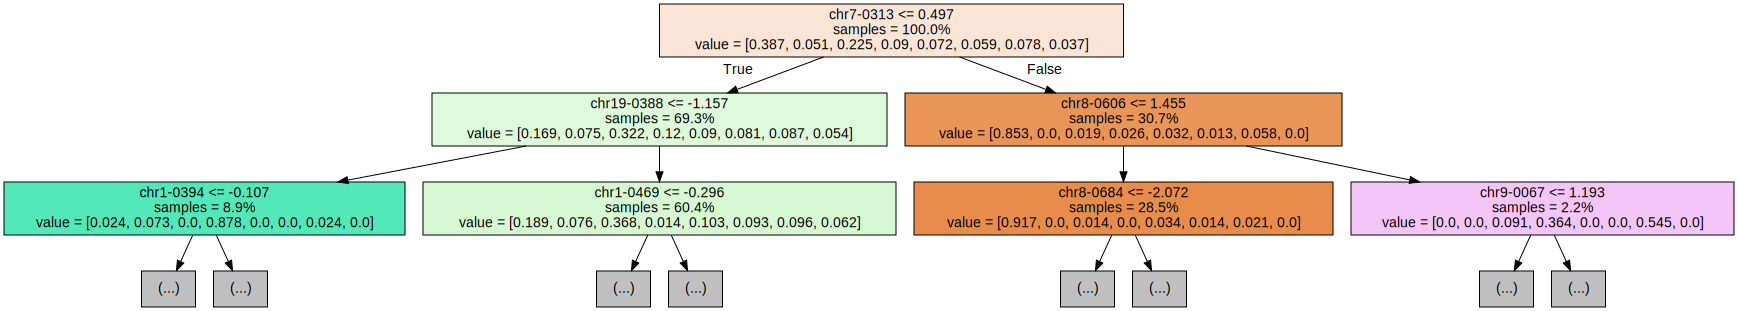

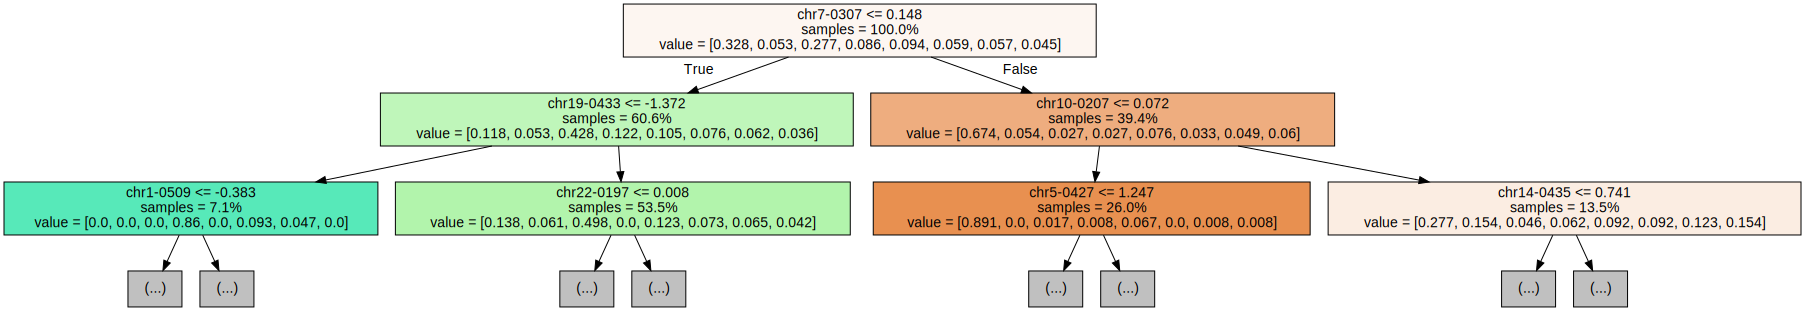

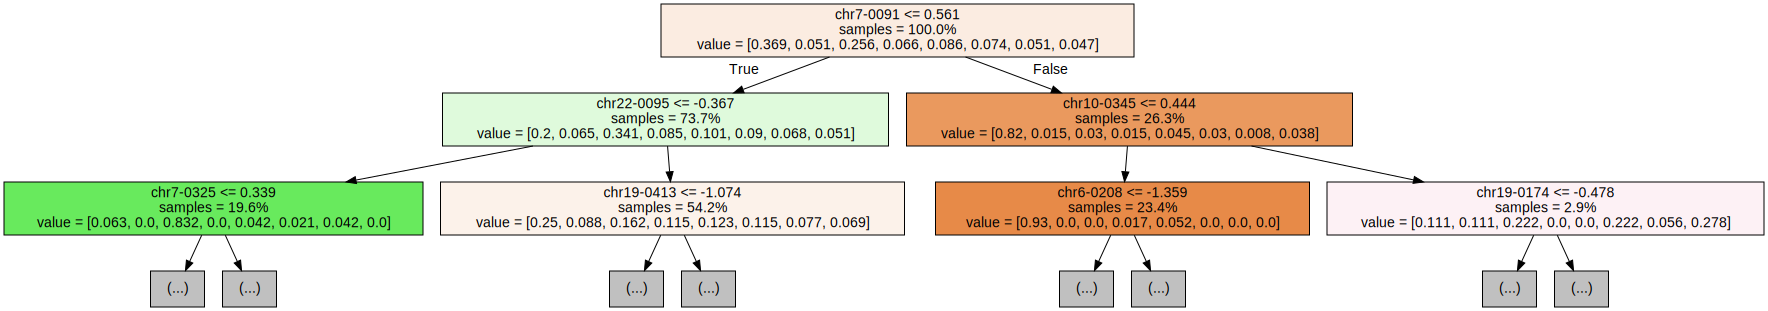

In [3]:
# Data Processing
import pandas as pd
import numpy as np


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
import graphviz


df = pd.read_csv("/home/alpha/programs/python_files/datasets/cnv_and_mut/entitiesWES.csv")

df = df.dropna(axis=1)
# df = df[df.columns.drop(list(df.filter(regex='[YX]')))]
X = df.drop("Unnamed: 0",axis=1)
X = X.drop("entity",axis=1)
y = df["entity"].map({'gbm_cnv':0,'k27_cnv':1,'mng_cnv':2,'oligo_cnv':3,'pxa_cnv':4,'astroLow_cnv':5,'astroHigh_cnv':6,'pa_cnv':7})

# Standartize data
X =( X - X.mean() ) / X.std()

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(type(X_train))

# Model fitting
rf = RandomForestClassifier(max_depth=19,n_estimators=354)
rf.fit(X_train, y_train)

# Accuracy testprint(y_pred)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Export the first three decision trees from the forest

graphviz.set_jupyter_format

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



In [13]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2180e2f250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f21839946d0>})

In [14]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 412}


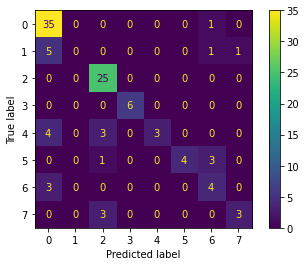

In [15]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

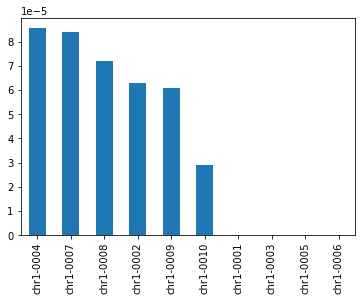

In [21]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_[:10], index=X_train.columns[:10]).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();